## Import Statements

In [40]:
# STANDARDS
import numpy as np
import pandas as pd
import pprint


#PRE PROCESSING
from sklearn.preprocessing import StandardScaler

# FEATURE SELECTION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

# PIPELINE
from sklearn.pipeline import Pipeline

# REGRESSORS
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

# NUERAL NETWORK
from sklearn.neural_network import MLPRegressor

# CROSS - VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

# EVALUATION

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import get_scorer

# PLOTTING
import plotting
dir(plotting)
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, scoring=None, title="Learning Curve"):
    # Calculate learning curve data with cross-validation and scoring
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring
    )
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
    plt.title(title)  # Add title here
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

import random
import matplotlib.pyplot as plt
import seaborn as sns


## Information on Data Set

In [41]:
df = pd.read_csv("/Users/lavangi.yadava/solar energy project/Pasion et al dataset.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [43]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [44]:
data_excluded = df.drop(columns=['Location', 'Season'])

<Axes: >

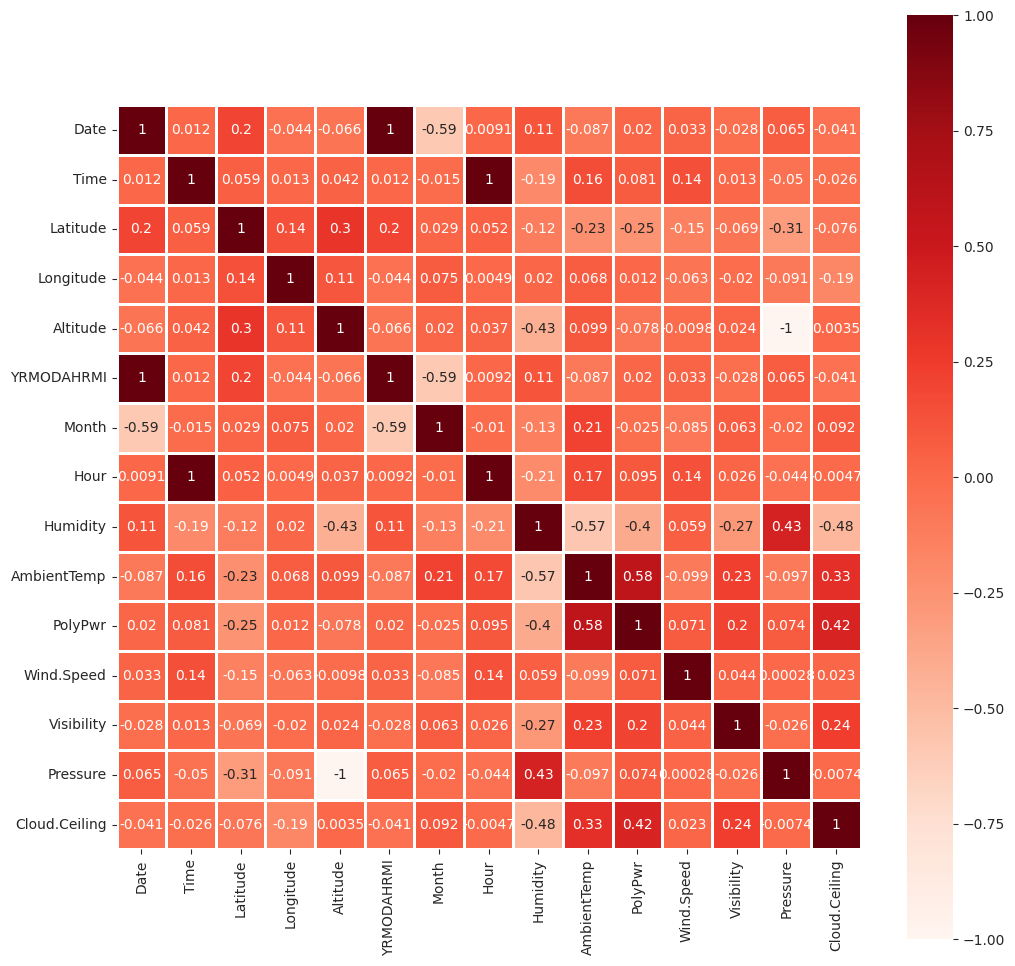

In [45]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data_excluded.corr(), vmin=-1, vmax=1, cmap='Reds', annot=True, linewidth=1, square=True)

## Pre - Processing

### Train / Test Split

In [46]:
# isolating feature/target variables
y = data_excluded.loc[:, 'PolyPwr']
X = data_excluded.drop(labels='PolyPwr', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Scaler

In [47]:
# allows all features to be comparable to one another 
scaler = StandardScaler()

### Cross Validator

In [48]:
# data division
cv = KFold(n_splits=3, shuffle=True)

### Pipelines 

In [49]:
pipes = {}
def add_pipe(pipe, name):
    if name in pipes.keys():
        print(f"A pipe called '{name}' already exists!")
        new_name = input("Enter another name:]")
        pipes[f"{new_name}"] =  pipe
        print(f"'{new_name}' added to 'pipes'")
    else:
        pipes[f'{name}'] = pipe
        print(f"'{name}' added to 'pipes'")

### Learning Curves

In [50]:
def plot_lc(model):
    metric = [['MAE', 'neg_mean_absolute_error'], ['RMSE', 'neg_root_mean_squared_error'], ['R2', 'r2']]
    for i in range(len(metrics)):
        print(f'Scoring Measure: {metrics[i][0]}')
        plot_learning_curve(pipes[model], X_train_sel, y_train, cv=cv, n_jobs=-1, scoring=metrics[i][1])
        plt.show();

### Add Scores

In [51]:
scores = {}
def add_scores(score, model):
    if model in scores.keys():
        print(f"A pipe called '{model}' already exists!")
        new_model = input("Enter another model name :] ")
        scores[f'{model}'] = scores
        print(f"'{new_model}' added to 'scores'")
    else:
        scores[f'{model}'] = scores
        print(f"'{model}' added to 'scores'")

## Continued Data Analysis

## Shapes

In [52]:
# checking split data
shapes = f"X shape = {X.shape}, y_shape = {y.shape}, \n\
X_train shape = {X_train.shape}, y_train shape = {y_train.shape}, \n\
X_test shape = {X_test.shape}, y_test.shape = {y_test.shape}"
print(shapes)

X shape = (21045, 14), y_shape = (21045,), 
X_train shape = (16836, 14), y_train shape = (16836,), 
X_test shape = (4209, 14), y_test.shape = (4209,)


## Modified HeatMap and Less Features

<Axes: >

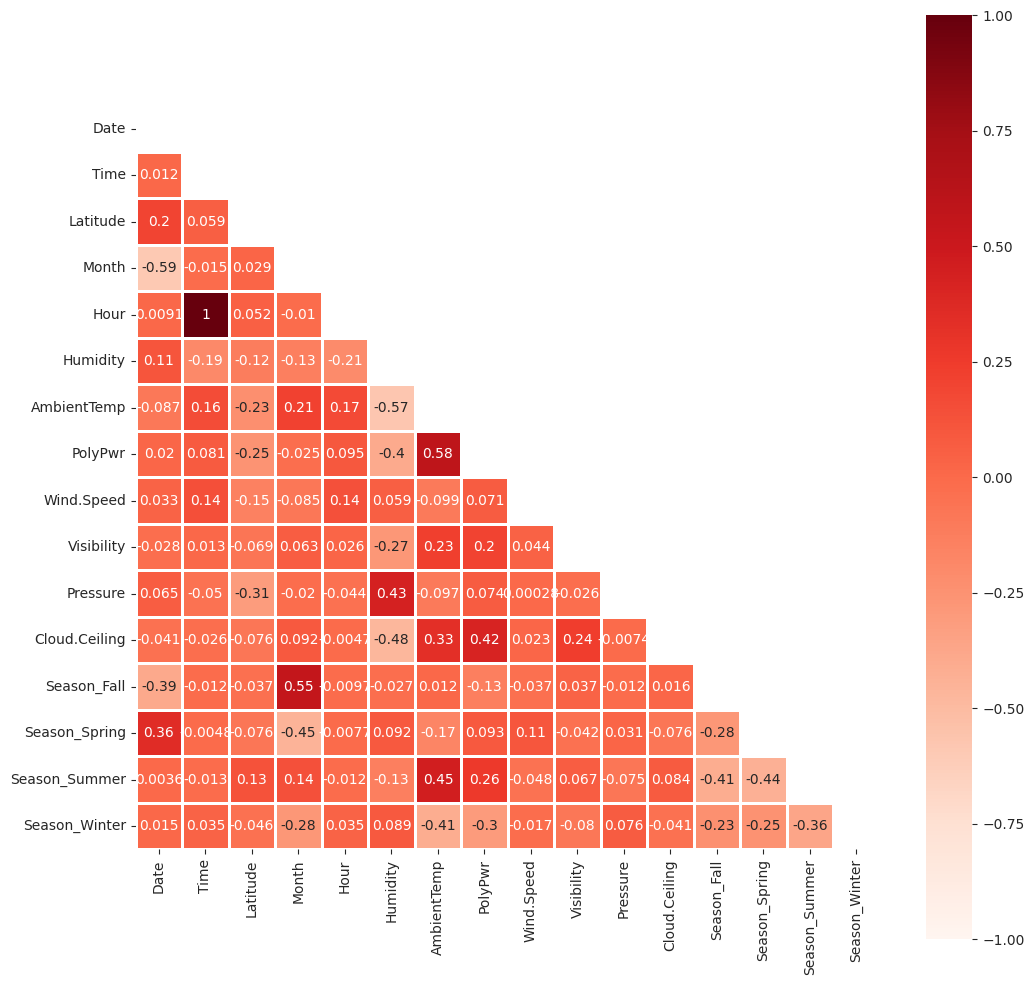

In [53]:
# one-hot encoding 'seasons'
df_mod = pd.get_dummies(df, columns=['Season'], drop_first=False)

# dropping variables with correlation between 0 - 0.02 with PolyPwr
df_mod.drop(['Longitude', 'Altitude', 'YRMODAHRMI', 'Location'], axis=1, inplace=True)
corr = df_mod.corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='Reds', annot=True, linewidth=1, square=True, mask=matrix)

### Feature Selection

In [54]:
# fast enough, works with noisy data
etr = ExtraTreesRegressor()

In [55]:
rfe = RFE(etr)
pipe_rfe = Pipeline([('scaler', StandardScaler()), ('rfe', rfe), ('etr', etr)])
add_pipe(pipe_rfe, 'rfe')

'rfe' added to 'pipes'


### Cross Validate RFE Pipeline

In [56]:
rfe_score = cross_val_score(pipe_rfe, X_train, y_train, cv=cv, n_jobs=-1, scoring='r2')

In [57]:
np.mean(rfe_score)

0.636149693428647

### Feature Importance

In [58]:
pipe_rfe.fit(X_train, y_train)

attribute_rfe = pipe_rfe.named_steps.etr
support = pipe_rfe.named_steps['rfe'].support_

feature_importance = pipe_rfe.named_steps['etr'].feature_importances_

f = support
rfe_ranking = pd.DataFrame(support, index=X_train.columns, columns=['Rank']).sort_values(by='Rank', ascending=True)


In [59]:
for name, importance in zip(X_train.loc[:,:], feature_importance):
    print(name, "=", importance)

Date = 0.09404744430563643
Time = 0.09271146816330532
Latitude = 0.14617263074131898
Longitude = 0.12480902501606245
Altitude = 0.27578326917530227
YRMODAHRMI = 0.09438344193964276
Month = 0.17209272065873177


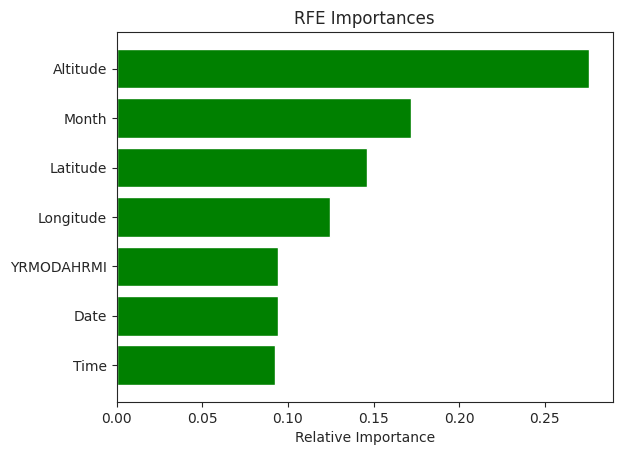

In [60]:
features = X_train.columns
importances = feature_importance
indices = np.argsort(importances)

plt.title('RFE Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

indices = np.argsort(importances)

In [65]:
new_data = pd.DataFrame({
    'Date': [20231231],
    'Time': [1533],
    'Latitude': [32.929188],
    'Longitude': [-97.155715],
    'Altitude': [84],
    'YRMODAHRMI': [2.01712E+11],
    'Month': [12],
    'Hour': [15],
    'Humidity': [44],
    'AmbientTemp': [13.8889],
    'Wind.Speed': [11.2654],
    'Visibility': [16.0934],
    'Pressure': [1019.6375907859999],
    'Cloud.Ceiling': [12.192],
    
})

predictions = pipe_rfe.predict(new_data)
print(predictions)

[5.0393186]
